In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from datetime import date
import datetime

## Settings

In [30]:
sns.set_style("white")
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b'][::-1]
#colors = ['#f7fcfd','#e0ecf4','#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#810f7c','#4d004b'][::-1]

sns.set_palette(colors)

x_size, y_size = 12,8
plt.rcParams.update({'font.size': 16})

plot_used = True

# Counters per route

In [33]:
f = open("data\\counters_per_route.txt", encoding="utf8")
route_counters = {}

for l in f:
    if l.startswith("#") or (l == "\n"):
        continue
    ss = l.strip().split(";")
    route_id = ss[0] 
    #route_id = int(route_id)
    cs = ss[1:]  
    cs = list(map(lambda x: x.strip(), cs))
    if cs != ['']:
        route_counters[route_id] = cs
    
ILC_counters = [ route_counters[k][0] for k in route_counters]    
ILC_counters

['1003-116-1',
 '1004-136-1',
 '1040-236-1',
 '1040-236-2',
 '1026-136-1',
 '1025-116-1',
 '686-1',
 '686-2']

## Read and process the data

In [32]:
df = pd.read_csv("data\\counters.csv")
df.counter_id.unique()

array(['1003-116-1', '1004-136-1', '1009-168-1', '1010-188-1',
       '1025-116-1', '1026-136-1', '1028-18a-1', '1040-236-1',
       '1040-236-2', '1055-166-1', '1056-186-1', '1927-261-1',
       '1928-281-1', '686-1', '686-2'], dtype=object)

In [34]:
if plot_used:
    df = df[df.counter_id.isin(ILC_counters)]

In [36]:
df.counter_id.unique()

array(['1003-116-1', '1004-136-1', '1025-116-1', '1026-136-1',
       '1040-236-1', '1040-236-2', '686-1', '686-2'], dtype=object)

## Distributions

In [37]:
counter_ids = df.counter_id.unique()

### Basic

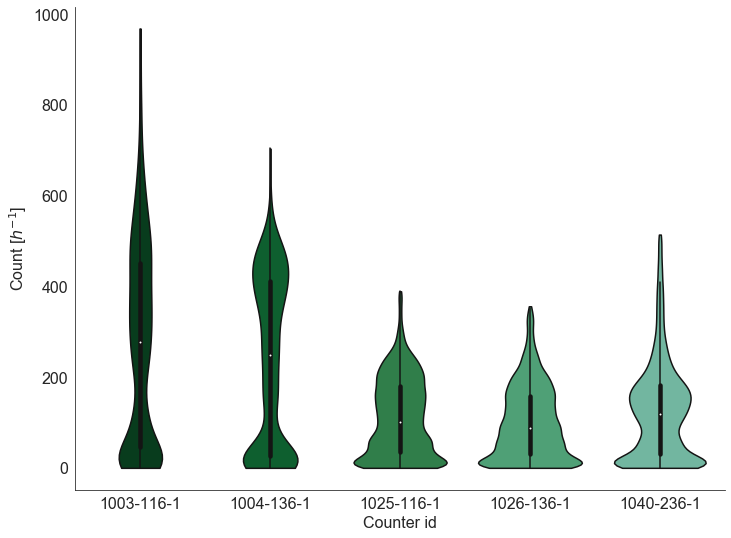

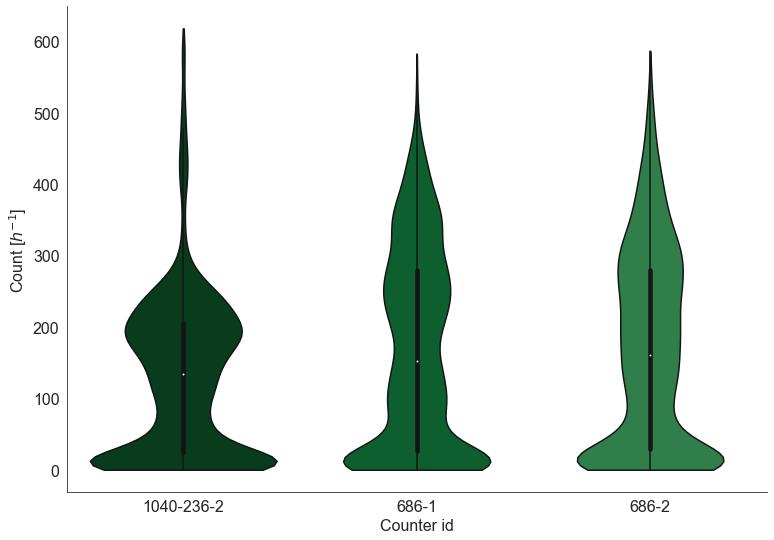

In [38]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_"+str(i)+".png")
    

### Workdays

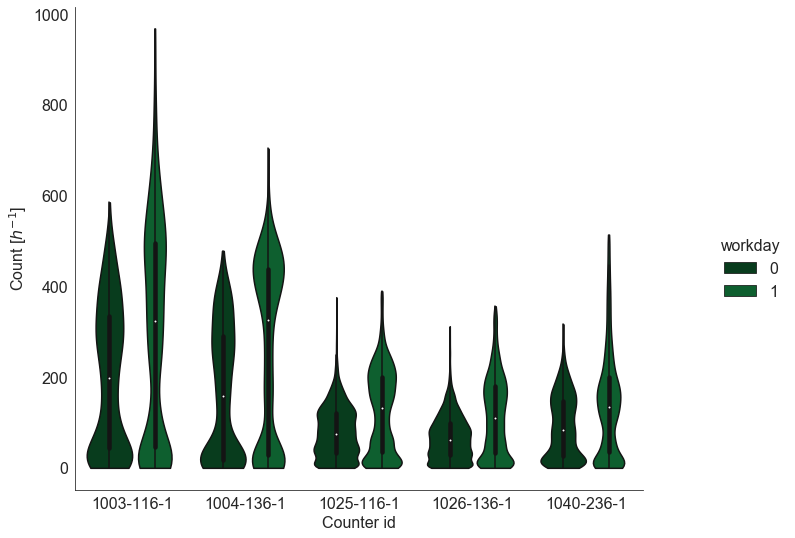

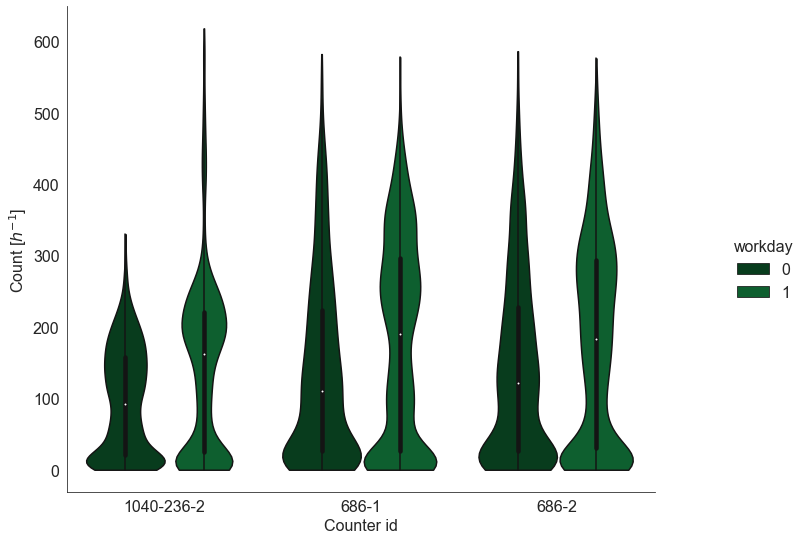

In [39]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', hue="workday", kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    #plt.xticks
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_workdays_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_workdays_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_workdays_"+str(i)+".png")
    plt.show()

### Weather

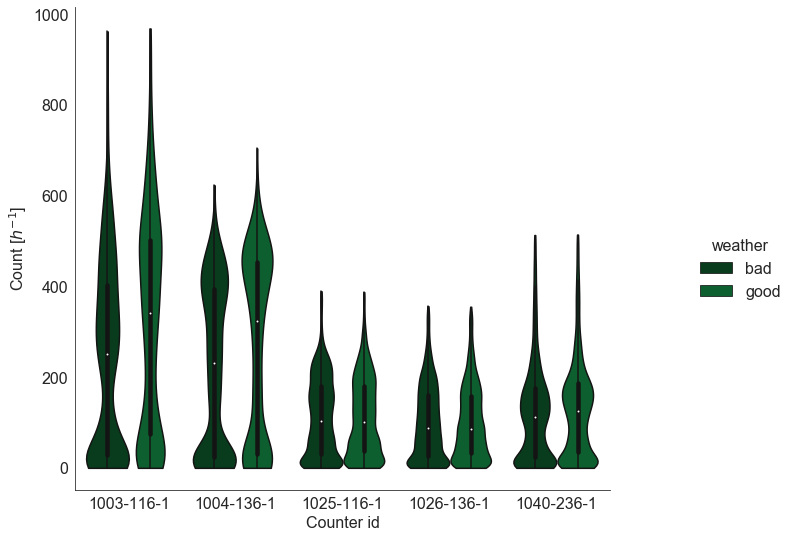

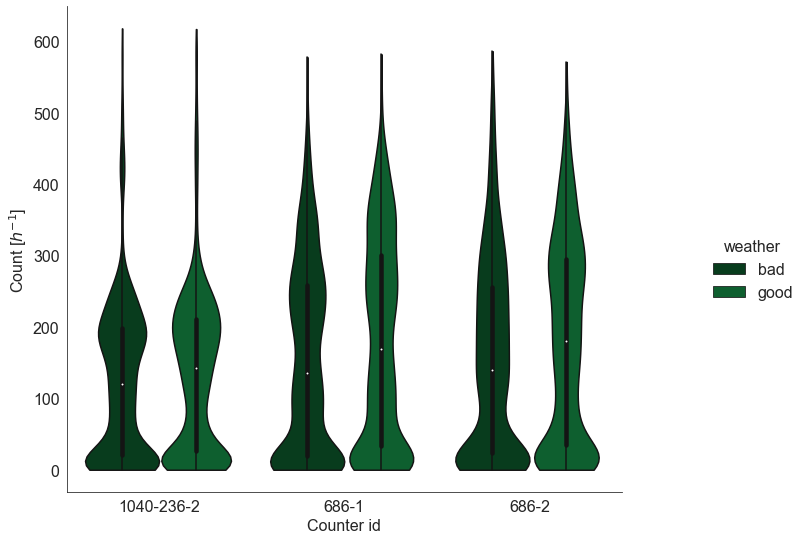

In [40]:
for i in range(0, len(counter_ids), 5):
    df_small = df[df.counter_id.map(lambda x: x in counter_ids[i:i+5])]
    sns.catplot(data=df_small, y='count', x='counter_id', hue="weather", kind="violin", cut=0)
    f = plt.gcf()
    f.set_size_inches(x_size,y_size)
    plt.xlabel("Counter id")
    plt.ylabel("Count [$h^{-1}$]")
    
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_weather_"+str(i)+".pdf", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_weather_"+str(i)+".svg", bbox_inches="tight")
    plt.savefig("figs\\counts\\ILC\\ILC_distribution_counts_weather_"+str(i)+".png")
    
    plt.show()

## Histplot

## Separated by a direction

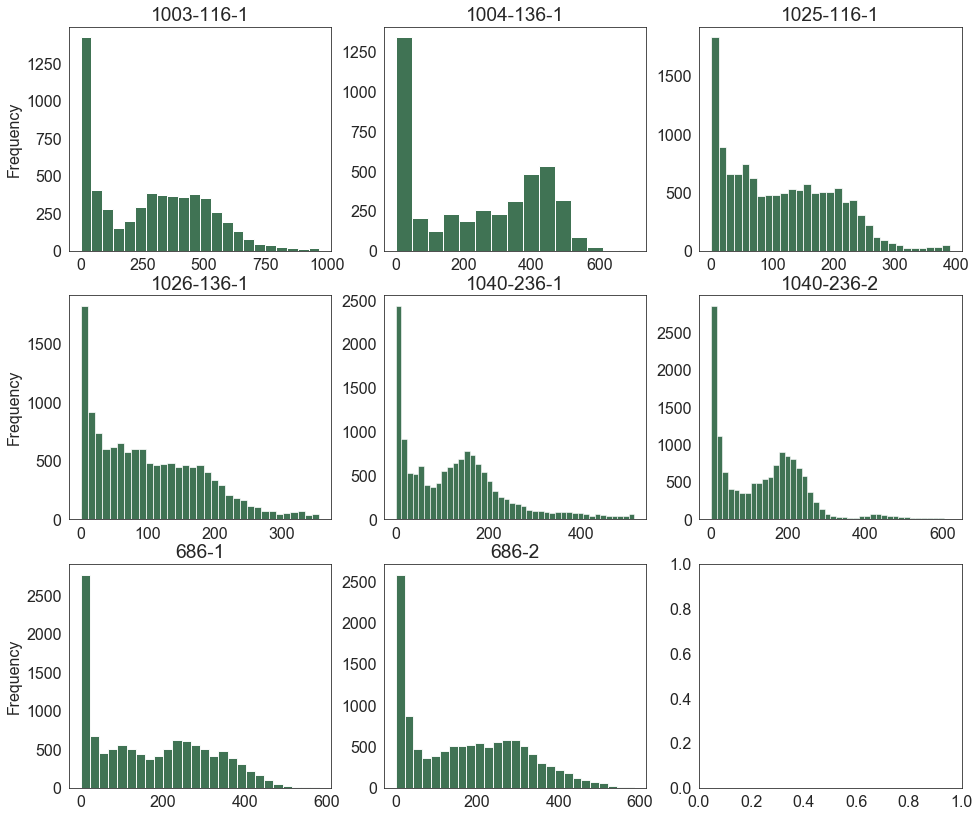

In [43]:
counters_ids = counter_ids.sort()

ncols = 3
fig, axes = plt.subplots(ncols = ncols, nrows = int(np.ceil(len(counter_ids)/ncols)))
axes = axes.flatten()         
fig.set_size_inches(16, 14)

for i, (ax, counter_id) in enumerate(zip(axes, counter_ids)):
    sns.histplot(data=df[df['counter_id'] == counter_id], x="count", ax = ax)
    #ax.set_xlabel(counter_id)
    #ax.set_xlabel("Count")
    ax.set_xlabel("")
    ax.set_title(counter_id)
    if i % ncols:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Frequency")

plt.savefig("figs\\counts\\ILC\\ILC_hist_directions.pdf", bbox_inches="tight")
plt.savefig("figs\\counts\\ILC\\ILC_hist_directions.svg", bbox_inches="tight")
plt.savefig("figs\\counts\\ILC\\ILC_hist_directions.png")
        
plt.show()

## Not separated by a direction

In [44]:
counter_ids2 = list(set(map(lambda x: x.split("-")[0], counter_ids)))
counter_ids2.sort()
#counter_ids2 = list(set(map(lambda x: x.split("-")[0], counter_ids)))
#counter_ids2.sort()

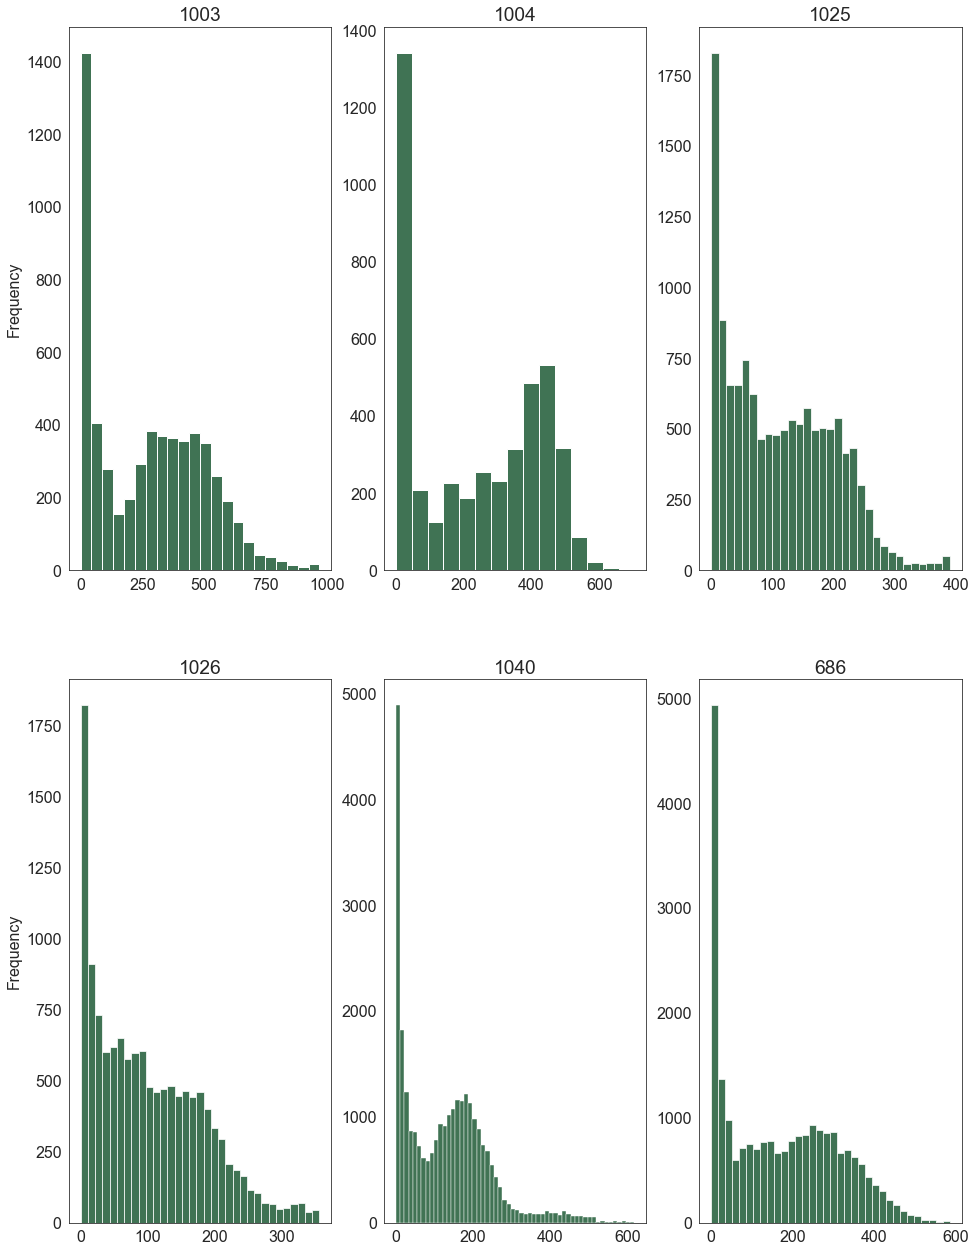

In [45]:
ncols = 3
fig, axes = plt.subplots(ncols = ncols, nrows = int(np.ceil(len(counter_ids2)/ncols)))
axes = axes.flatten()         
fig.set_size_inches(16, 22)

for i, (ax, counter_id) in enumerate(zip(axes, counter_ids2)):
    sns.histplot(data=df[df['counter_id'].str.startswith(counter_id)], x="count", ax = ax)
    ax.set_xlabel("")
    ax.set_title(counter_id)
    if i % ncols:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Frequency")
        
plt.savefig("figs\\counts\\ILC\\ILC_hist.pdf", bbox_inches="tight")
plt.savefig("figs\\counts\\ILC\\ILC_hist.svg", bbox_inches="tight")
plt.savefig("figs\\counts\\ILC\\ILC_hist.png")

plt.show()